# Overview

# Data Understanding

In [66]:
# importing necessaries libraries
# basic
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# importing customer cases
case = pd.read_csv("data/customer_cases.csv")
case.head()

,Unnamed: 0,case_id,date_time,customer_id,channel,reason
0,1,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,2,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,3,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,4,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [68]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   330512 non-null  int64 
 1   case_id      330512 non-null  object
 2   date_time    330512 non-null  object
 3   customer_id  330512 non-null  object
 4   channel      330512 non-null  object
 5   reason       330512 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.1+ MB


In [69]:
case = case.drop(columns=["Unnamed: 0"])
case.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [70]:
info = pd.read_csv("data/customer_info.csv")
info.head()

,Unnamed: 0,customer_id,age,gender
0,1,C2448,76,female
1,2,C2449,61,male
2,3,C2450,58,female
3,4,C2451,62,female
4,5,C2452,71,male


In [71]:
info = info.drop(columns=["Unnamed: 0"])
info.head()

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female
4,C2452,71,male


In [72]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  508932 non-null  object
 1   age          508932 non-null  int64 
 2   gender       508932 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.6+ MB


In [73]:
merge_one = pd.merge(case, info, on="customer_id")
merge_one.head()

,case_id,date_time,customer_id,channel,reason,age,gender
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male


In [74]:
product = pd.read_csv("data/customer_product.csv")
product.head()

,Unnamed: 0,customer_id,product,signup_date_time,cancel_date_time
0,1,C2448,prd_1,2017-01-01 10:35:09,NaN
1,2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,4,C2451,prd_2,2017-01-01 13:32:08,NaN
4,5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [75]:
product = product.drop(columns=["Unnamed: 0"])
product.head()

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaN
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaN
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [76]:
merge_two = pd.merge(merge_one, product, on= "customer_id")
merge_two.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [77]:
p_info = pd.read_csv("data/product_info.csv")
p_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [78]:
p_info.rename(columns={"product_id": "product"}, inplace=True)
p_info.head()

,product,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [79]:
data = pd.merge(merge_two, p_info, on="product")
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           330512 non-null  object
 1   date_time         330512 non-null  object
 2   customer_id       330512 non-null  object
 3   channel           330512 non-null  object
 4   reason            330512 non-null  object
 5   age               330512 non-null  int64 
 6   gender            330512 non-null  object
 7   product           330512 non-null  object
 8   signup_date_time  330512 non-null  object
 9   cancel_date_time  76686 non-null   object
 10  name              330512 non-null  object
 11  price             330512 non-null  int64 
 12  billing_cycle     330512 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 32.8+ MB


In [81]:
data.isnull().sum()

case_id                  0
date_time                0
customer_id              0
channel                  0
reason                   0
age                      0
gender                   0
product                  0
signup_date_time         0
cancel_date_time    253826
name                     0
price                    0
billing_cycle            0
dtype: int64

In [82]:
display(data.describe(), data.describe(include="object"))

,age,price,billing_cycle
count,330512.000000,330512.000000,330512.000000
mean,57.840617,672.163265,6.598880
std,9.394142,537.413942,5.499119
min,22.000000,125.000000,1.000000
25%,52.000000,125.000000,1.000000
50%,58.000000,1200.000000,12.000000
75%,65.000000,1200.000000,12.000000
max,78.000000,1200.000000,12.000000


,case_id,date_time,customer_id,channel,reason,gender,product,signup_date_time,cancel_date_time,name
count,330512,330512,330512,330512,330512,330512,330512,330512,76686,330512
unique,330512,329205,258660,2,2,2,2,257798,59539,2
top,CC101,2021-05-18 13:58:31,C20510,phone,support,male,prd_1,2020-03-30 10:32:51,2021-08-16 13:06:05,annual_subscription
freq,1,3,5,286840,200985,189224,168227,6,5,168227


In [83]:
#splitting cancel date time to cancel date and time 
data[["cancel_date", "cancel_time"]] = data["cancel_date_time"].str.split(' ', expand=True)
#converting cancel date to datetime
data["cancel_date"] = pd.to_datetime(data["cancel_date"])

#dropping cance_date_time column
data.drop(columns=["cancel_date_time"], inplace=True)

#extracting month and year from cancel date
data["cancel_month"] = data["cancel_date"].dt.month
data["cancel_year"] = data["cancel_date"].dt.year

data.drop(columns=["cancel_date"], inplace=True)

data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,name,price,billing_cycle,cancel_time,cancel_month,cancel_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,annual_subscription,1200,12,NaN,NaN,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,annual_subscription,1200,12,10:00:02,9.0,2021.0
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,annual_subscription,1200,12,16:24:55,1.0,2019.0
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,monthly_subscription,125,1,NaN,NaN,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,annual_subscription,1200,12,18:06:01,6.0,2021.0


In [19]:
# find out how many repeat cases by same customer
#we assume the sign up is upto 30 -April 2024
# that as may we add a CLV column that will be our target
# we will do both segementation and clv
# null values for cancel date and time will be 30th April 2024
# time is important in analysis
# drop time column
# time might affect recommendation of customer service 

***
we note 
- 330512 total cases
- 


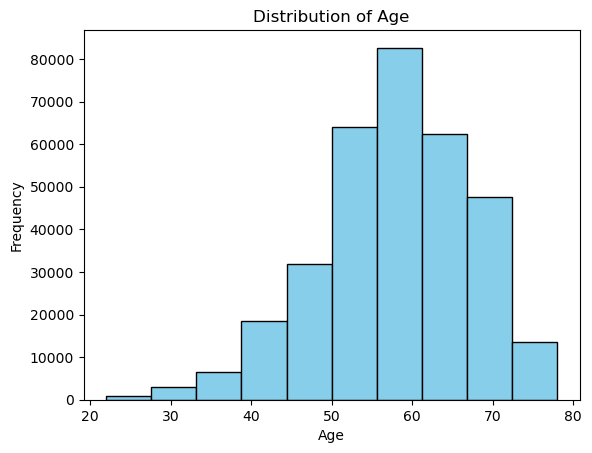

In [20]:
# visualizing age distribution
plt.hist(data["age"], bins=10, color="skyblue", edgecolor="black")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

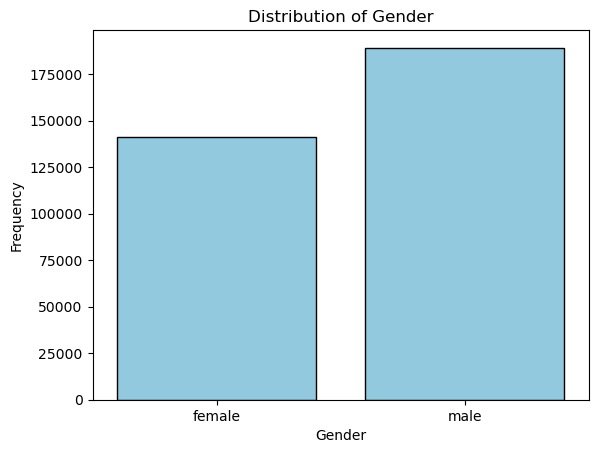

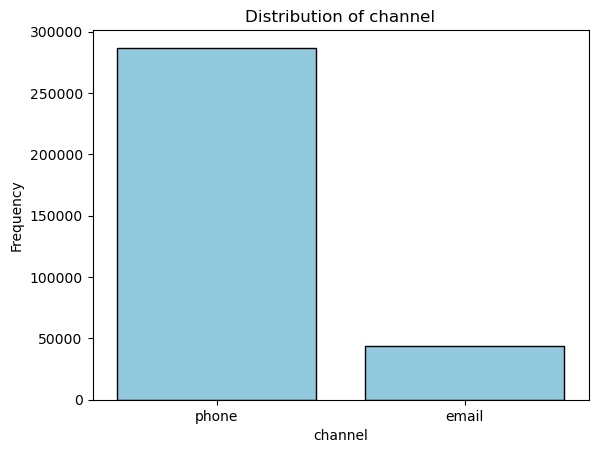

In [84]:
sns.countplot(x='gender', data=data, color="skyblue", edgecolor="black")

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()
sns.countplot(x='channel', data=data, color="skyblue", edgecolor="black")

plt.xlabel("channel")
plt.ylabel("Frequency")
plt.title("Distribution of channel")
plt.show()

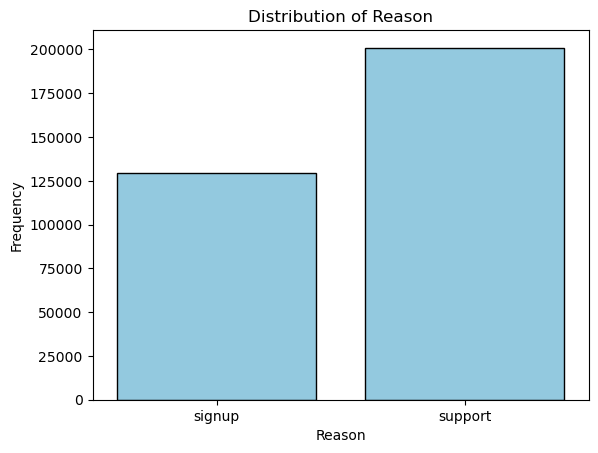

In [85]:
sns.countplot(x='reason', data=data, color="skyblue", edgecolor="black")

plt.xlabel("Reason")
plt.ylabel("Frequency")
plt.title("Distribution of Reason")
plt.show()

In [21]:
#merged_cases_cProduct[["date_time", "signup_date_time", "cancel_date_time"]] = merged_cases_cProduct[["date_time", "signup_date_time", "cancel_date_time"]].apply(pd.to_datetime)
#merge_case_encoded = pd.get_dummies(merged_cases_cProduct, columns=["channel", "reason", "product","signup_date_time", "cancel_date_time"], sparse=True)


In [22]:
#encoded_features = merge_case_encoded[['date_time', 'signup_date_time', 'cancel_date_time', 'channel_phone', 'channel_email', 'reason_signup', 'reason_support']]
#correlation_matrix = encoded_features.corr()
#print(correlation_matrix)

In [23]:
#case["date_time"] = pd.to_datetime(case["date_time"])
##case_encoded = pd.get_dummies(case, columns=["channel", "reason"])
#encoded_features = case_encoded[['channel_phone', 'channel_email', 'reason_signup', 'reason_support']]
#correlation_matrix = encoded_features.corr()
#print(correlation_matrix)